# CSCI 6920 - Homework 1

## Problem Statement 
There are many companies that are publicly traded to invest in. However, there is always a risk of investing in a company that goes bankrupt. I want to answer the question: If we have information on a company's books, could we predict if the company will go bankrupt?

The problem described above is framed as a classification task. Therefore, the natural choice for a model is Logistic regression because it's a linear model, which makes it highly interpretable and is built for classification tasks.

## The Dataset and Exploratory Data Analysis
Dataset from kaggle on company bankruptcy prediction: [Company Bankruptcy Prediction](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction)

### Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

### Read Data

In [2]:
seed = 10
data_path = ".\\data.csv"
bankruptcy_df = pd.read_csv(data_path)

### Exploratory Data Analysis

In [3]:
# display all avaiable features.
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are 95 features and 1 target column. For the targets, 0 is non-bankrupt and 1 is bankrupt.

In [4]:
# sample of datapoints (6 bankrupt and 6 not bankrupt companies).
bankruptcy_df.head(12)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,

The two categoricial features are liability-assets flag and net income flag which have already been encoded. Therefore, no extra work is needed. 

In [5]:
# Statistical information regarding each feature.
bankruptcy_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

Evaluating the statistical information above the "Net Income Flag" gives us no new information since all of the values are 1. Thus, we drop that features.

In [6]:
bankruptcy_df = bankruptcy_df.loc[:, bankruptcy_df.columns != ' Net Income Flag']

In [7]:
# Check if there is any missing data for each feature.
bankruptcy_df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

No missing value in dataset.

In [8]:
feature_corr = bankruptcy_df.corr().abs()["Bankrupt?"] # corrolation of of features based on the target.
bankruptcy_df = bankruptcy_df.loc[:, feature_corr >= 0.2] # take the most correlated features.

Removed all features that didn't have significant correlation with the target.

In [9]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Persistent EPS in the Last Four Seasons                  6819 non-null   float64
 5    Per Share Net profit before tax (Yuan ¥)                 6819 non-null   float64
 6    Debt ratio %                                             6819 non-null   float64
 7    Net worth/Assets                                         6819 non-null   float64
 8    Net profit before

In [10]:
# Statistical information regarding each feature split on the target class.
bankruptcy_df.groupby("Bankrupt?").describe()

ROA(C) before interest and depreciation before interest            \
                                                             count      mean   
Bankrupt?                                                                      
0                                                     6599.0        0.508069   
1                                                      220.0        0.418503   

                                                                       \
                std       min       25%       50%       75%       max   
Bankrupt?                                                               
0          0.057694  0.000000  0.478623  0.504314  0.537074  1.000000   
1          0.081068  0.024277  0.391703  0.441330  0.469276  0.576951   

           ROA(A) before interest and % after tax                      \
                                            count      mean       std   
Bankrupt?                                                               
0                                          6599.0  0.562015  0.060898   
1                                           220.0  0.456947  0.107674   

                                                             \
                min       25%       50%       75%       max   
Bankrupt?                                                     
0          0.006923  0.537724  0.561219  0.590438  1.000000   
1          0.000000  0.431531  0.490215  0.526630  0.582861   

           ROA(B) before interest and depreciation after tax            \
                                                       count      mean   
Bankrupt?                                                                
0                                                     6599.0  0.556659   
1                                                      220.0  0.461483   

                                                                       \
                std       min       25%       50%       75%       max   
Bankrupt?                                                               
0          0.057864  0.000000  0.529472  0.553563  0.585577  1.000000   
1          0.091825  0.033514  0.432665  0.488597  0.519153  0.619091   

           Persistent EPS in the Last Four Seasons                      \
                                             count      mean       std   
Bankrupt?                                                                
0                                           6599.0  0.230146  0.032510   
1                                            220.0  0.188818  0.030709   

                                                             \
                min       25%       50%       75%       max   
Bankrupt?                                                     
0          0.078567  0.215278  0.225111  0.239671  1.000000   
1          0.000000  0.176397  0.195944  0.208944  0.252529   

           Per Share Net profit before tax (Yuan ¥)                      \
                                              count      mean       std   
Bankrupt?                                                                 
0                                            6599.0  0.185581  0.032646   
1                                             220.0  0.147765  0.027848   

                                                             Debt ratio %  \
                min       25%       50%       75%       max         count   
Bankrupt?                                                                   
0          0.009114  0.170972  0.180236  0.194246  1.000000        6599.0   
1          0.000000  0.137267  0.155306  0.166340  0.198765         220.0   

                                                                       \
               mean       std       min       25%       50%       75%   
Bankrupt?                                                               
0          0.110714  0.052071  0.000000  0.071560  0.109381  0.145796   
1          0.187047  0.056234  0.001088  0.158728  0.187426  0.214280   

          

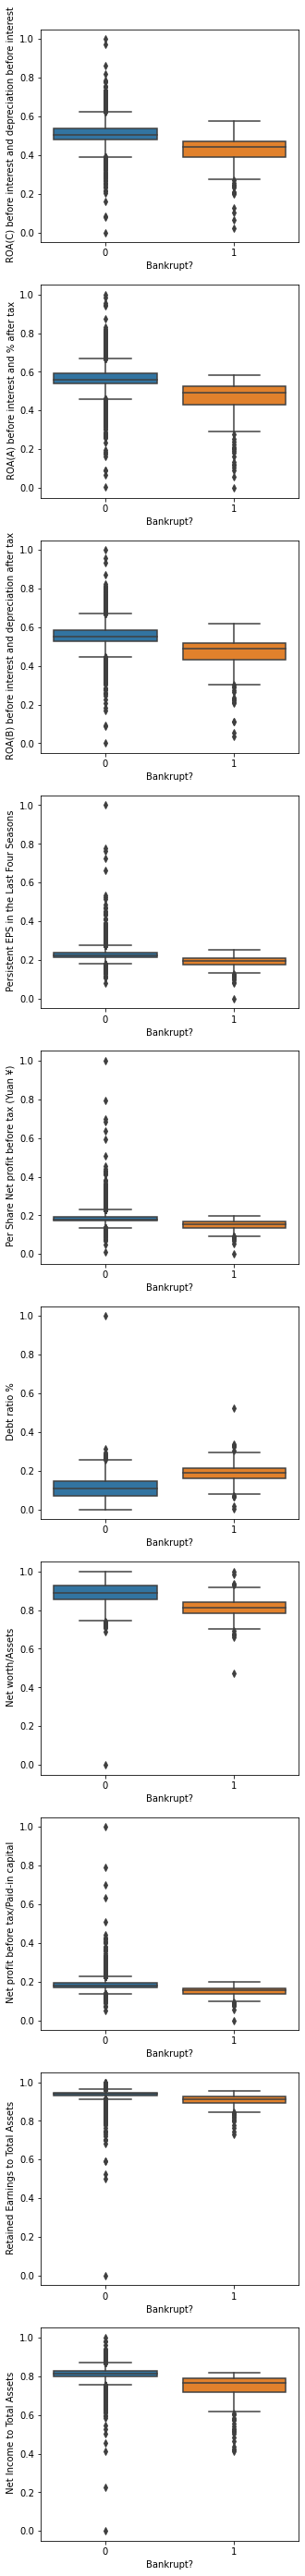

In [11]:
N = len(bankruptcy_df.columns[1:])

fig, axs = plt.subplots(N, figsize=(5, N*5))
for ax, column in zip(axs, bankruptcy_df.columns[1:]):
    sns.boxplot(data=bankruptcy_df, x="Bankrupt?", y=column, ax=ax)

plt.show()

We can see that a lot of these features have different statuistical information based on there class.

<AxesSubplot:>

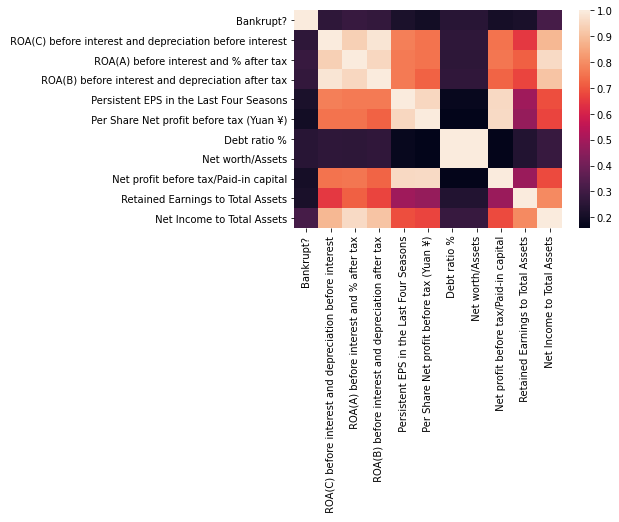

In [12]:
sns.heatmap(data=bankruptcy_df.corr().abs())

We see that a lot of our features are highly corrilated. This is inpart since the features sometime are very closly related e.g. ROA(A), ROA(B) and ROA(C).

In [13]:
# check class balance in dataset.
print("Percentage of each Class:")
print(bankruptcy_df["Bankrupt?"].value_counts(normalize=True))
print("\nNumber of Samples of each Class:")
print(bankruptcy_df["Bankrupt?"].value_counts())

Percentage of each Class:
0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

Number of Samples of each Class:
0    6599
1     220
Name: Bankrupt?, dtype: int64


There is a heavy inbalance in the dataset between bankrupt and non-bankrupt companies. I'll resolve this by downsampling the non-bankrupt class to 250 examples.

In [14]:
pos_df = bankruptcy_df[bankruptcy_df['Bankrupt?'] == 1].sample(frac=1, random_state=seed) # extract all the bankrupt rows and scramble.
pos_train_df = pos_df.iloc[:180,:] # approximately 80% of the bankrupt companies for the training set. 
pos_test_df = pos_df.iloc[180:,:] # approximately 20% of the bankrupt companies for the testing set. 

neg_df = bankruptcy_df[bankruptcy_df['Bankrupt?'] == 0].sample(frac=1, random_state=seed) # extract all the non-bankrupt rows and scramble.
neg_train_df = neg_df.iloc[:250,:] # 250 of the non-bankrupt companies for the training set. 
neg_test_df = neg_df.iloc[250:,:] # Rest of the non-bankrupt companies for the testing set.

train_df = pd.concat([pos_train_df, neg_train_df], axis=0)
test_df = pd.concat([pos_test_df, neg_test_df], axis=0)

In [15]:
# check class balance in train dataset.
print("Percentage of each Class on Train dataset:")
print(train_df["Bankrupt?"].value_counts(normalize=True))

print("\nTrain set has", train_df.shape[0], "data points.")
print("Test set has", test_df.shape[0], "data points.")

Percentage of each Class on Train dataset:
0    0.581395
1    0.418605
Name: Bankrupt?, dtype: float64

Train set has 430 data points.
Test set has 6389 data points.


## Logistic Regression and Gradient Descent (w/ Optimizations)

For my two variances of gradient descent I chose batch and min-batch and as my two optimizations of gradient descent I chose gradient descent w/ momentum and Adam.

In [16]:
class LogisticRegression:
    def __init__(self, dim, seed=None):
        if seed:
            np.random.seed(seed)
        
        self.w = np.random.normal(0, 1, (1, dim))
        self.b = np.random.normal(0, 1, 1)

    def fit(self, data, epochs, opt, bs=None, verbose=False):
        self.X, self.y = data
        
        losses = []  
        for e in range(epochs):
            if bs is None: # for batch gradient descent.
                X_batchs = [self.X]
                y_batchs = [self.y]
            else: # for min-batch gradient descent.
                N = self.X.shape[0]
                idxs = np.random.choice(N, N, False)

                X_scram = self.X[idxs]
                y_scram = self.y[idxs]

                batches = [(n+1)*bs for n in range(N//bs)]
                X_batchs = np.split(X_scram, batches, axis=0)
                y_batchs = np.split(y_scram, batches, axis=0)

            for X_batch, y_batch in zip(X_batchs, y_batchs):
                self.X_batch = X_batch
                self.y_batch = y_batch
                
                self.y_hat = self.predict_probability(self.X_batch)
                opt.step() # update step.
            
            self.y_hat = self.predict_probability(self.X)
            loss = self._loss(self.y, self.y_hat)

            if verbose:
                print(f"Epoch {e+1} loss {loss:.4f}.")
                
            losses.append(loss)
        
        return losses


    def _loss(self, y, y_hat, epsilon=1e-20):
        N = y.shape[0]

        return -np.sum(y * np.log(y_hat+epsilon) + (1 - y) * np.log(1 - y_hat+epsilon)) / N

    def _dloss(self, X, y, y_hat):
        N = X.shape[0]
        dw = ((y_hat - y).reshape(1, N) @ X) / N
        db = np.sum(self._linear(X)-y) / N

        return (dw, db)

    def _linear(self, X):
        return self.w @ X.T + self.b
    
    def _sigmoid(self, z):
        return (1 + np.exp(-z))**-1
    
    def predict_probability(self, X):
        return self._sigmoid(self._linear(X)).flatten()

    def predict(self, X, threshold=0.5):
        return (self.predict_probability(X) >= threshold).astype(np.int16)

    def evaluate(self, X, y, threshold=0.5):
        N = X.shape[0]
        y_hat = self.predict(X, threshold=threshold)
        return np.sum(y == y_hat)/N


class GradientDescent:
    def __init__(self, model, lr, gamma=0):
        self.model = model
        
        if lr <= 0:
            raise Exception("lr must be greater than 0.")
        self.lr = lr
        
        # momentum variables. When gamma=0 the algorithm becomes base gradient descent.
        if gamma < 0:
            raise Exception("gamma can't be less than 0.")
            
        self.gamma = gamma
        self.v_w0, self.v_b0 = 0, 0
    
    def step(self):
        try:
            X = self.model.X_batch
            y = self.model.y_batch
            y_hat = self.model.y_hat
        except:
            raise Exception("Error encountered fetching model class variables.")

        dw, db = self.model._dloss(X, y, y_hat)

        v_w = self.gamma * self.v_w0 + self.lr * dw
        v_b = self.gamma * self.v_b0 + self.lr * db

        self.model.w -= v_w
        self.model.b -= v_b

        self.v_w0, self.v_b0 = v_w, v_b

class Adam:
    def __init__(self, model, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.model = model
        
        if lr <= 0:
            raise Exception("lr must be greater than 0.")
        elif beta1 < 0 or beta1 > 1:
            raise Exception("beta1 must be [0,1].")
        elif beta2 < 0 or beta2 > 1:
            raise Exception("beta2 must be [0,1].")
        elif epsilon <= 0:
            raise Exception("epsilon must be greater than 0.")
            
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        self.w_m0, self.w_v0 = 0, 0
        self.b_m0, self.b_v0 = 0, 0

        self.t = 1


    def step(self):
        try:
            X = self.model.X_batch
            y = self.model.y_batch
            y_hat = self.model.y_hat
        except:
            raise Exception("Error encountered fetching model class variables.")

        dw, db = self.model._dloss(X, y, y_hat)

        # update w.
        w_m = self.beta1 * self.w_m0 + (1 - self.beta1) * dw
        w_v = self.beta2 * self.w_v0 + (1 - self.beta2) * dw**2

        w_m_hat = w_m / (1 - self.beta1**self.t)
        w_v_hat = w_v / (1 - self.beta2**self.t)

        self.model.w -= (self.lr * w_m_hat) / (np.sqrt(w_v_hat) + self.epsilon)

        self.w_m0, self.w_v0 = w_m, w_v

        # update b.
        b_m = self.beta1 * self.b_m0 + (1 - self.beta1) * db
        b_v = self.beta2 * self.b_v0 + (1 - self.beta2) * db**2

        b_m_hat = b_m / (1 - self.beta1**self.t)
        b_v_hat = b_v / (1 - self.beta2**self.t)

        self.model.b -= (self.lr * b_m_hat) / (np.sqrt(b_v_hat) + self.epsilon)

        self.b_m0, self.b_v0 = b_m, b_v
        
def evaluation_model(model, X_train , y_train, X_test, y_test):
    train_acc = model.evaluate(X_train, y_train)
    print(f"Train set accurcy is {train_acc*100:.2f}%.")
    
    y_hat = model.predict(X_train)
    
    cm = confusion_matrix(y_train, y_hat)
    train_fnr = cm[1,0]/(cm[1,0]+cm[1,1])
    sns.heatmap(cm, 
                xticklabels=["Not Bankrupted", "Bankrupted"], 
                yticklabels=["Not Bankrupted", "Bankrupted"], 
                annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Train Set Confusion Matrix")
    plt.show()

    test_acc = model.evaluate(X_test, y_test)
    print(f"Test set accurcy is {test_acc*100:.2f}%.")
          
    y_hat = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_hat)
    test_fnr = cm[1,0]/(cm[1,0]+cm[1,1])
    sns.heatmap(cm, 
                xticklabels=["Not Bankrupted", "Bankrupted"], 
                yticklabels=["Not Bankrupted", "Bankrupted"], 
                annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Test Set Confusion Matrix")
    plt.show()

    return [train_acc, train_fnr, test_acc, test_fnr]

Seperate the features and targets for the train and test sets.

In [17]:
X_train = train_df.loc[:, train_df.columns != 'Bankrupt?'].to_numpy()
y_train = train_df["Bankrupt?"].to_numpy()

X_test = test_df.loc[:, test_df.columns != 'Bankrupt?'].to_numpy()
y_test = test_df["Bankrupt?"].to_numpy()

Mean center and scale by standard deviation to standardize features.

In [18]:
scaler = StandardScaler().fit(X_train) # mean center and scale by sd the data.

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
epochs = 10000

In [20]:
results_df = pd.DataFrame(columns=["Optimization Procedure", "Optimizer", "Epochs", "Train Time", "Train Loss", "Train Accuracy", "Train False Negative Rate", "Test Accuracy", "Test false Negative Rate"])

### Logistic Regression with Batch Gradient Descent

It took 0.856 seconds to run 10000 epochs.


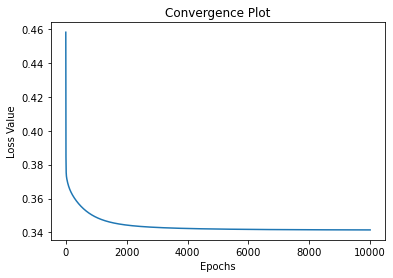

Train set accurcy is 86.74%.


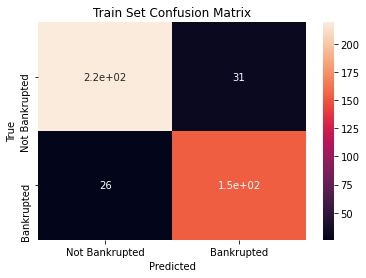

Test set accurcy is 86.29%.


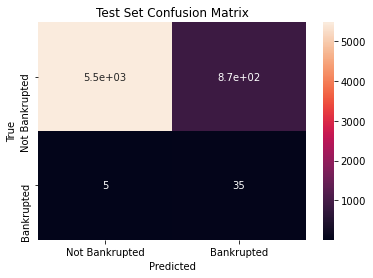

In [21]:
lr_gd_batch_model = LogisticRegression(X_train.shape[1], seed=seed)
optimizer = GradientDescent(lr_gd_batch_model, 1)
tic = time()
losses = lr_gd_batch_model.fit((X_train, y_train), 10000, optimizer, verbose=False)
toc = time()

train_time = toc-tic
print(f"It took {train_time:.3f} seconds to run {epochs} epochs.")

plt.plot(range(len(losses)), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.title("Convergence Plot")
plt.show()

eval_results = evaluation_model(lr_gd_batch_model, X_train , y_train, X_test, y_test)
results_df.loc[0] = ["Batch", "Gradient Descent"] + [epochs, train_time, losses[-1]] + eval_results 

### Logistic Regression with Batch Gradient Descent w/ Momentum

It took 0.898 seconds to run 10000 epochs.


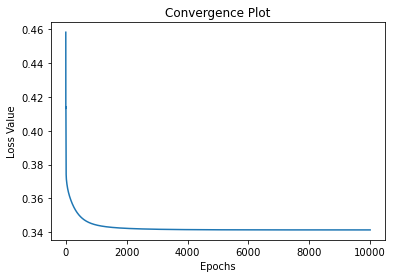

Train set accurcy is 86.98%.


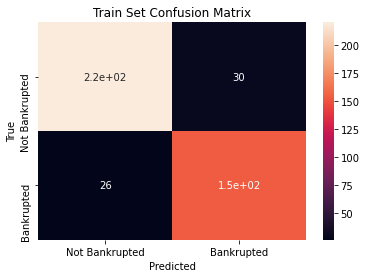

Test set accurcy is 86.30%.


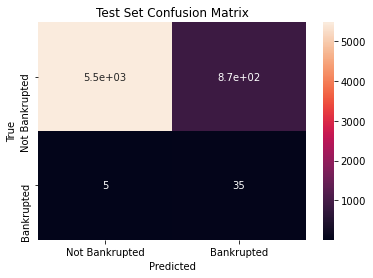

In [22]:
lr_gdm_batch_model = LogisticRegression(X_train.shape[1], seed=seed)
optimizer = GradientDescent(lr_gdm_batch_model, 1, gamma=0.5)
tic = time()
losses = lr_gdm_batch_model.fit((X_train, y_train), 10000, optimizer, verbose=False)
toc = time()

train_time = toc-tic
print(f"It took {train_time:.3f} seconds to run {epochs} epochs.")

plt.plot(range(len(losses)), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.title("Convergence Plot")
plt.show()

eval_results = evaluation_model(lr_gdm_batch_model, X_train , y_train, X_test, y_test)
results_df.loc[1] = ["Batch", "Gradient Descent w/ Momentum"] + [epochs, train_time, losses[-1]] + eval_results 

### Logistic Regression with Batch Adam

It took 1.370 seconds to run 10000 epochs.


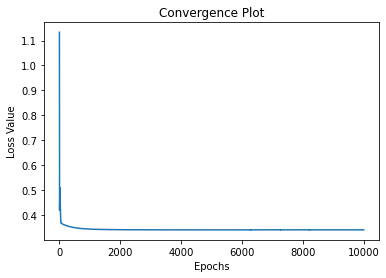

Train set accurcy is 86.98%.


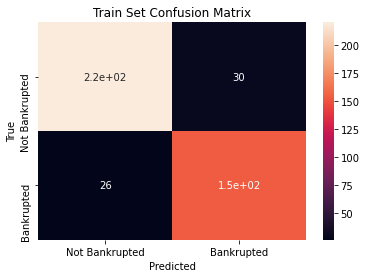

Test set accurcy is 86.29%.


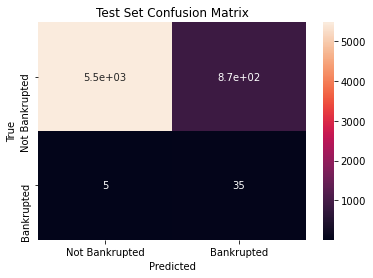

In [23]:
lr_adam_batch_model = LogisticRegression(X_train.shape[1], seed=seed)
optimizer = Adam(lr_adam_batch_model, 0.1)
tic = time()
losses = lr_adam_batch_model.fit((X_train, y_train), 10000, optimizer, verbose=False)
toc = time()

train_time = toc-tic
print(f"It took {train_time:.3f} seconds to run {epochs} epochs.")

plt.plot(range(len(losses)), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.title("Convergence Plot")
plt.show()

eval_results = evaluation_model(lr_adam_batch_model, X_train , y_train, X_test, y_test)
results_df.loc[2] = ["Batch", "Adam"] + [epochs, train_time, losses[-1]] + eval_results 

### Logistic Regression with Mini-Batch Gradient Descent

It took 4.732 seconds to run 10000 epochs.


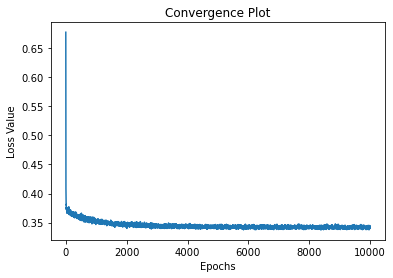

Train set accurcy is 86.51%.


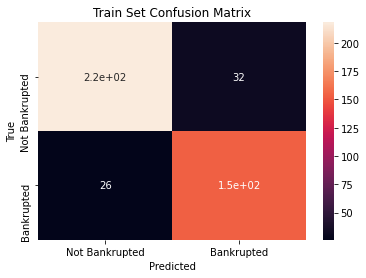

Test set accurcy is 86.18%.


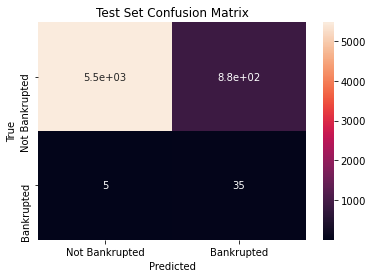

In [24]:
lr_gd_minibatch_model = LogisticRegression(X_train.shape[1], seed=seed)
optimizer = GradientDescent(lr_gd_minibatch_model, 0.1)
tic = time()
losses = lr_gd_minibatch_model.fit((X_train, y_train), epochs, optimizer, verbose=False, bs=64)
toc = time()

train_time = toc-tic
print(f"It took {train_time:.3f} seconds to run {epochs} epochs.")

plt.plot(range(len(losses)), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.title("Convergence Plot")
plt.show()

eval_results = evaluation_model(lr_gd_minibatch_model, X_train , y_train, X_test, y_test)
results_df.loc[3] = ["Mini-Batch", "Gradient Descent"] + [epochs, train_time, losses[-1]] + eval_results 

### Logistic Regression with Mini-Batch Gradient Descent w/ Momentum

It took 4.012 seconds to run 10000 epochs.


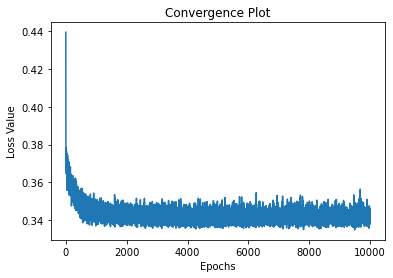

Train set accurcy is 87.67%.


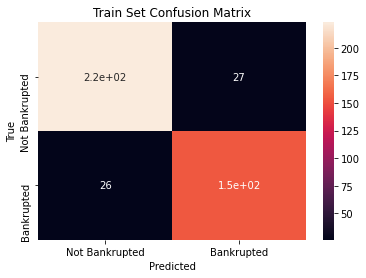

Test set accurcy is 87.21%.


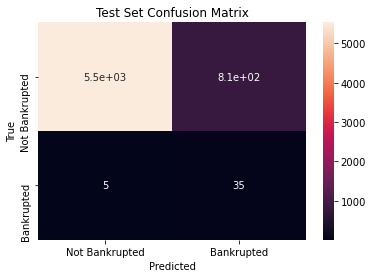

In [25]:
lr_gdm_minibatch_model = LogisticRegression(X_train.shape[1], seed=seed)
optimizer = GradientDescent(lr_gdm_minibatch_model, 0.1, gamma=0.7)
tic = time()
losses = lr_gdm_minibatch_model.fit((X_train, y_train), epochs, optimizer, verbose=False, bs=64)
toc = time()

train_time = toc-tic
print(f"It took {train_time:.3f} seconds to run {epochs} epochs.")

plt.plot(range(len(losses)), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.title("Convergence Plot")
plt.show()

eval_results = evaluation_model(lr_gdm_minibatch_model, X_train , y_train, X_test, y_test)
results_df.loc[4] = ["Mini-Batch", "Gradient Descent w/ Momentum"] + [epochs, train_time, losses[-1]] + eval_results 

### Logistic Regression with Mini-Batch Adam

It took 5.171 seconds to run 10000 epochs.


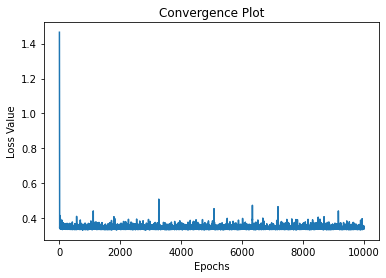

Train set accurcy is 86.74%.


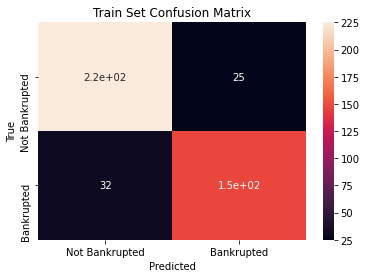

Test set accurcy is 88.51%.


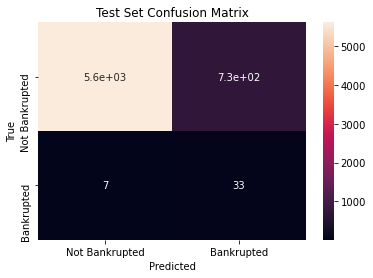

In [26]:
lr_adam_minibatch_model = LogisticRegression(X_train.shape[1], seed=seed)
optimizer = Adam(lr_adam_minibatch_model, 1)
tic = time()
losses = lr_adam_minibatch_model.fit((X_train, y_train), epochs, optimizer, verbose=False, bs=64)
toc = time()

train_time = toc-tic
print(f"It took {train_time:.3f} seconds to run {epochs} epochs.")

plt.plot(range(len(losses)), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.title("Convergence Plot")
plt.show()

eval_results = evaluation_model(lr_adam_minibatch_model, X_train , y_train, X_test, y_test)
results_df.loc[5] = ["Mini-Batch", "Adam"] + [epochs, train_time, losses[-1]] + eval_results 

In [27]:
results_df

,Optimization Procedure,Optimizer,Epochs,Train Time,Train Loss,Train Accuracy,Train False Negative Rate,Test Accuracy,Test false Negative Rate
0,Batch,Gradient Descent,10000,0.855513,0.341477,0.867442,0.144444,0.862889,0.125
1,Batch,Gradient Descent w/ Momentum,10000,0.897830,0.341401,0.869767,0.144444,0.863046,0.125
2,Batch,Adam,10000,1.370191,0.341399,0.869767,0.144444,0.862889,0.125
3,Mini-Batch,Gradient Descent,10000,4.731730,0.341849,0.865116,0.144444,0.861794,0.125
4,Mini-Batch,Gradient Descent w/ Momentum,10000,4.011792,0.337992,0.876744,0.144444,0.872124,0.125
5,Mini-Batch,Adam,10000,5.171480,0.338272,0.867442,0.177778,0.885115,0.175


## Conclution

### Model Selection
The model that achieved the highest testing accuracy on the testing set was mini-batch adam. However, this came with the cost of having more false negatives. Within the context of the problem I defined at the start of this notebook, I want to know if a company will go bankrupt so that I won't invest in it. But if the model classifies a company as not bankrupt and goes bust, that will cost me my investment. This is the worst-case scenario and one I would want to avoid. For this reason, I wouldn't choose this mini-batch + adam model for this problem.

The second best performer was mini-batch + Gradient Descent w/ Momentum. This model did not sacrifice its gains in accuracy for a higher false negative rate.

### Optimization Algorithms
The optimized gradient descent algorithms consistently performed better than the base gradient descent (except for adam with Batch-GD. However, it did achieve a lower train loss). This suggests that these algorithms help navigate the loss-space much better because of their modifications.